# Question 3 - Causal Transformer Model using Relative Positions

| **Team Member**               | **Tasks**                                                                                          |
|-------------------------------|----------------------------------------------------------------------------------------------------|
| **Dhanush Chandar Sivakumar** | Padding, Encoding, Class separability check, Initial model build, and Evaluation                  |
| **Rajesh Jayaraman**          | Second iteration of the model with tuning and Model Interpretability                                  |


| **Task**                                      | **Status**                                    | **Results**                                  | **Individual Responsible** |
|-----------------------------------------------|-----------------------------------------------|----------------------------------------------|-----------------------------|
| **Causal Transformer Model using Relative Positions** |                                               |                                              |                             |
| Hidden Memory Size                            | 64                                             |                                             |                             |
| Model Configuration                           | Config of model trained                       |                                              |  Dhanush Chandar Sivakumar                           |
| Train Time                                    | Calculated                                             |   6806.05 seconds                                           |                             |
| **Training Data Check**                       |                                               |         Dhanush Chandar Sivakumar                                     |                             |
| Confusion Matrix                              | Built                                        |                                              |                             |
| F1 Score for Positive                         | Calculated                                             |0.804947475432057                                             |                             |
| F1 Score for Negative                         | Calculated                                             |  0.6815112502628565                                            |                             |
| AUC                                           | Plotted                                      | AUC = 0.9116697408842133                                      |                             |
| Accuracy                                      | Computed                                     | Accuracy = 0.7053333333333334
|                             |
| **Feature Engineering**                       |                                               |      Rajesh Jayaraman                                        |                             |
| Interpretability                              | Performed - Global and Local                  |   Local - SHAP , Global - LIME                                           |                             |
| Highest Weighted Features                     | 2 Features with the Highest Weights           |   'great' 'fantastic'                                           |                             |
| **Cross Validation**                          |                                               |       Rajesh Jayaraman                                       |                             |
| Type of Cross Validation                      | Type of Cross Validation performed            |   Stratified KFold                                           |                             |
| Findings                                      | Findings of Cross Validation?                 |  The model shows improving performance across folds with a solid mean accuracy of 84.36%, indicating good generalization and stability in predictions.                                            |                             |
| **Testing Data Check**                        |                                               |            Dhanush Chandar Sivakumar                                  |                             |
| Confusion Matrix                              | Built                                        |                                              |                             |
| F1 Score for Positive                         | Calculated                                             |   0.7629368734760227                                           |                             |
| F1 Score for Negative                         | Calculated                                             |    0.6569018262723648                                         |                             |
| AUC                                           | Plotted                                     | AUC = 0.8906965840377162                                   |                             |
| Accuracy                                      | Computed                                     | Accuracy =  0.6794166666666667                                |                             |
| **Next Steps**                                |                                               | Performing Data Augmentation, Adjusting Learning rate and Hyperparameter tuning |                             |
| **Data Preprocessing and Feature Engineering** |                                               |                                              |                             |
| Regex Used                                    | Yes                     | 7                              |    Janvi Satishbhai Rai       |
| Emoji Handling                                | Done                    | All emojis handled             |  Janvi Satishbhai Rai         |
| Slang Handling                                | Done                    | All slangs handled             |   Janvi Satishbhai Rai        |
| Abbreviations Handled                         | Done                    | All abbreviations handled      |    Janvi Satishbhai Rai       |
| Negation Handling                             | Done                    | All negations handled          |    Janvi Satishbhai Rai       |
| Class Separability                            | Checked                 | Best featureset for separability |  Dhanush Chandar Sivakumar       |
| **Train and Test Handling**                   |                         |                                |                           |
| Steps Before Train-Test Split                 | - Data Cleaning         |                                |     Janvi Satishbhai Rai      |
|                                               | - Sentiment Mapping     |                                |      Janvi Satishbhai Rai     |
| Steps After Train-Test Split                  | - Text Tokenization        |                                |      Dhanush Chandar Sivakumar      |
|                                               | - Padding  |                                |      Dhanush Chandar Sivakumar      |
|                                               | - Label Encoding     |                                |      Dhanush Chandar Sivakumar      |
|                                               | - Model Training     |                                |      Dhanush Chandar Sivakumar    |
|                                               | - Model Evaluation     |                                |      Dhanush Chandar Sivakumar      |
|                                               | - Model Tuning    |                                |      Rajesh Jayaraman    |

## **Importing Libraries**

In [156]:
# Essential Libraries 
import numpy as np
import pandas as pd

import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Embedding, Dropout, LayerNormalization, MultiHeadAttention, Add, GlobalAveragePooling1D, Layer, LeakyReLU
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.activations import gelu
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.utils.class_weight import compute_class_weight

import re
import emoji
import string
import nltk
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from symspellpy import SymSpell, Verbosity

from sklearn.preprocessing import LabelEncoder,label_binarize 
from sklearn.metrics import confusion_matrix, classification_report, f1_score, roc_auc_score, accuracy_score, roc_curve, auc
from sklearn.model_selection import train_test_split, KFold
from sklearn.decomposition import PCA
from tensorflow.keras.callbacks import ReduceLROnPlateau

import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

import time
import warnings

import lime
import random
from lime.lime_tabular import LimeTabularExplainer
from lime.lime_text import LimeTextExplainer
import shap

import psutil
import os

# Enable warnings     
warnings.simplefilter('always', UserWarning)
warnings.filterwarnings("ignore")

In [2]:
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DC\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\DC\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

##  **Data Preprocessing and Feature Engineering**

### Load Data

In [3]:
#loading json file in chunks

chunk_size = 10000 
chunks = pd.read_json(r'D:/yelpdataset/yelp_academic_dataset_review.json', lines=True, chunksize=chunk_size)

review_df_list = []
for i in chunks:
    review_df_list.append(i)

review_df = pd.concat(review_df_list, ignore_index=True)

review_df.head(5)

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,KU_O5udG6zpxOg-VcAEodg,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,3,0,0,0,"If you decide to eat here, just be aware it is...",2018-07-07 22:09:11
1,BiTunyQ73aT9WBnpR9DZGw,OyoGAe7OKpv6SyGZT5g77Q,7ATYjTIgM3jUlt4UM3IypQ,5,1,0,1,I've taken a lot of spin classes over the year...,2012-01-03 15:28:18
2,saUsX_uimxRlCVr67Z4Jig,8g_iMtfSiwikVnbP2etR0A,YjUWPpI6HXG530lwP-fb2A,3,0,0,0,Family diner. Had the buffet. Eclectic assortm...,2014-02-05 20:30:30
3,AqPFMleE6RsU23_auESxiA,_7bHUi9Uuf5__HHc_Q8guQ,kxX2SOes4o-D3ZQBkiMRfA,5,1,0,1,"Wow! Yummy, different, delicious. Our favo...",2015-01-04 00:01:03
4,Sx8TMOWLNuJBWer-0pcmoA,bcjbaE6dDog4jkNY91ncLQ,e4Vwtrqf-wpJfwesgvdgxQ,4,1,0,1,Cute interior and owner (?) gave us tour of up...,2017-01-14 20:54:15


In [4]:
review_df['stars'].value_counts()

stars
5    3231627
4    1452918
1    1069561
3     691934
2     544240
Name: count, dtype: int64

In [5]:
review_df.isna().sum()

review_id      0
user_id        0
business_id    0
stars          0
useful         0
funny          0
cool           0
text           0
date           0
dtype: int64

### Sentiment Mapping 

Mapping review stars with sentiments:
1,2 = Negative,
3 = Neutral and 
4,5 = Positive 

In [6]:
sentiment_map = {
    1 : "Negative",
    2 : "Negative",
    3 : "Neutral",
    4: "Positive",
    5: "Positive"
}

review_df['sentiments'] = review_df['stars'].map(sentiment_map)
review_df.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date,sentiments
0,KU_O5udG6zpxOg-VcAEodg,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,3,0,0,0,"If you decide to eat here, just be aware it is...",2018-07-07 22:09:11,Neutral
1,BiTunyQ73aT9WBnpR9DZGw,OyoGAe7OKpv6SyGZT5g77Q,7ATYjTIgM3jUlt4UM3IypQ,5,1,0,1,I've taken a lot of spin classes over the year...,2012-01-03 15:28:18,Positive
2,saUsX_uimxRlCVr67Z4Jig,8g_iMtfSiwikVnbP2etR0A,YjUWPpI6HXG530lwP-fb2A,3,0,0,0,Family diner. Had the buffet. Eclectic assortm...,2014-02-05 20:30:30,Neutral
3,AqPFMleE6RsU23_auESxiA,_7bHUi9Uuf5__HHc_Q8guQ,kxX2SOes4o-D3ZQBkiMRfA,5,1,0,1,"Wow! Yummy, different, delicious. Our favo...",2015-01-04 00:01:03,Positive
4,Sx8TMOWLNuJBWer-0pcmoA,bcjbaE6dDog4jkNY91ncLQ,e4Vwtrqf-wpJfwesgvdgxQ,4,1,0,1,Cute interior and owner (?) gave us tour of up...,2017-01-14 20:54:15,Positive


In [7]:
#Dropping unnecessary  columns
review_df.drop(['review_id', 'user_id', 'business_id', 'stars','useful', 'funny', 'cool', 'date'], axis=1, inplace=True)
review_df.head()

,text,sentiments
0,"If you decide to eat here, just be aware it is...",Neutral
1,I've taken a lot of spin classes over the year...,Positive
2,Family diner. Had the buffet. Eclectic assortm...,Neutral
3,"Wow! Yummy, different, delicious. Our favo...",Positive
4,Cute interior and owner (?) gave us tour of up...,Positive


In [8]:
counts = review_df['sentiments'].value_counts()
print(counts)

sentiments
Positive    4684545
Negative    1613801
Neutral      691934
Name: count, dtype: int64


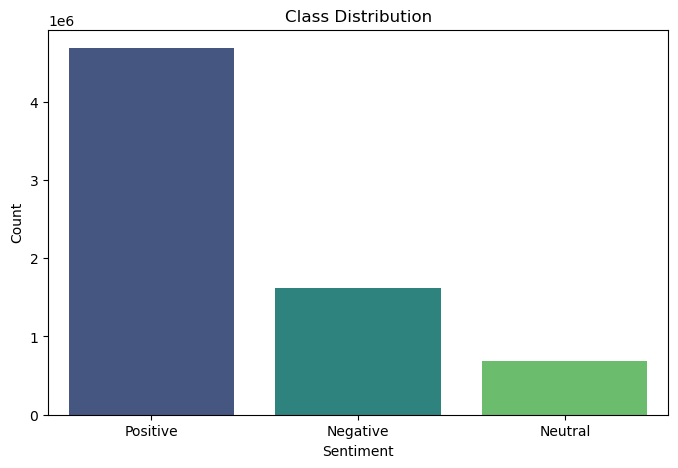

In [9]:
class_counts = review_df['sentiments'].value_counts()
plt.figure(figsize=(8, 5))
sns.barplot(x=class_counts.index, y=class_counts.values, palette='viridis')
plt.title('Class Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

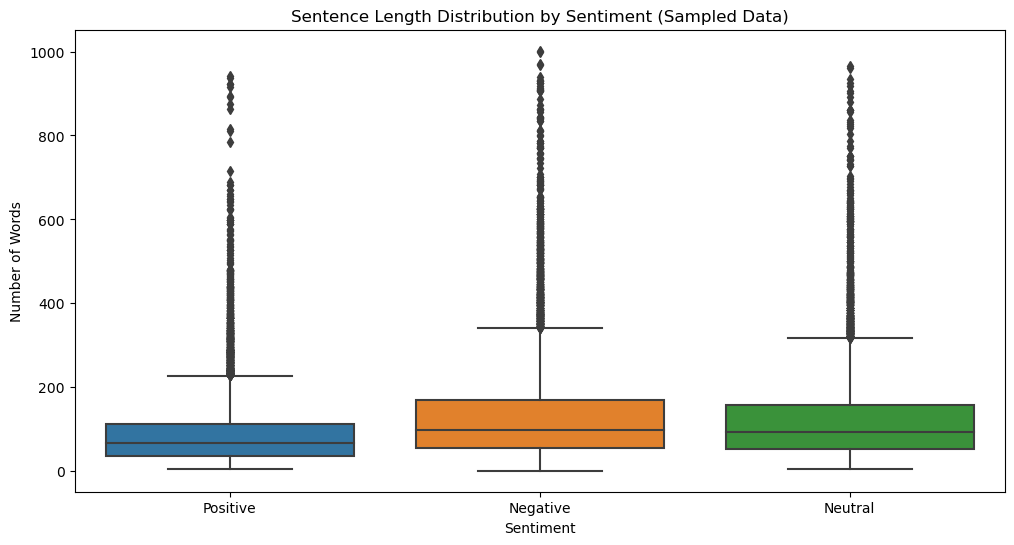

In [10]:
sample_size = 10000
sample_data = pd.concat([
    review_df[review_df['sentiments'] == 'Positive'].sample(sample_size, random_state=50),
    review_df[review_df['sentiments'] == 'Negative'].sample(sample_size, random_state=50),
    review_df[review_df['sentiments'] == 'Neutral'].sample(sample_size, random_state=50)
])

# Calculate sentence lengths
sample_data['sentence_length'] = sample_data['text'].apply(lambda x: len(x.split()))

# Plot sentence length distribution using a box plot
plt.figure(figsize=(12, 6))
sns.boxplot(data=sample_data, x='sentiments', y='sentence_length')
plt.title('Sentence Length Distribution by Sentiment (Sampled Data)')
plt.xlabel('Sentiment')
plt.ylabel('Number of Words')
plt.show()

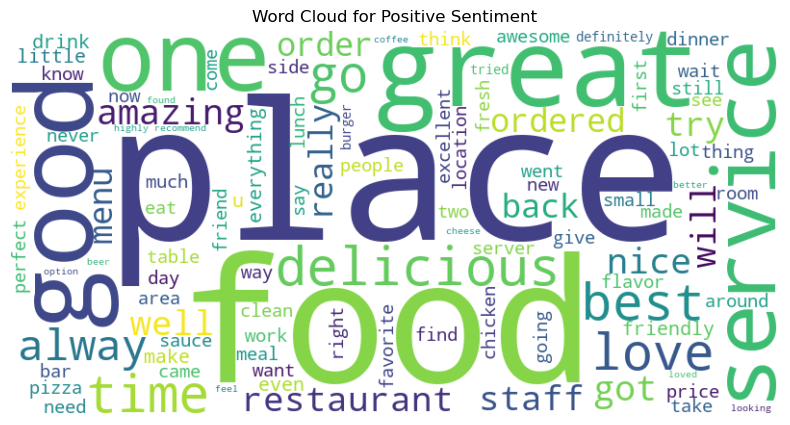

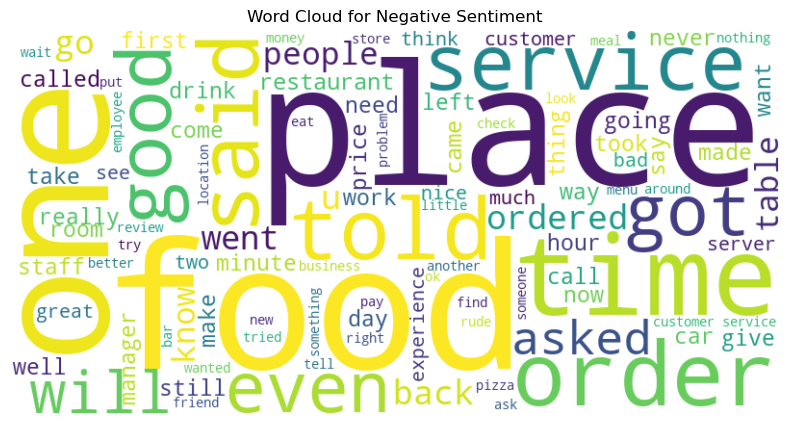

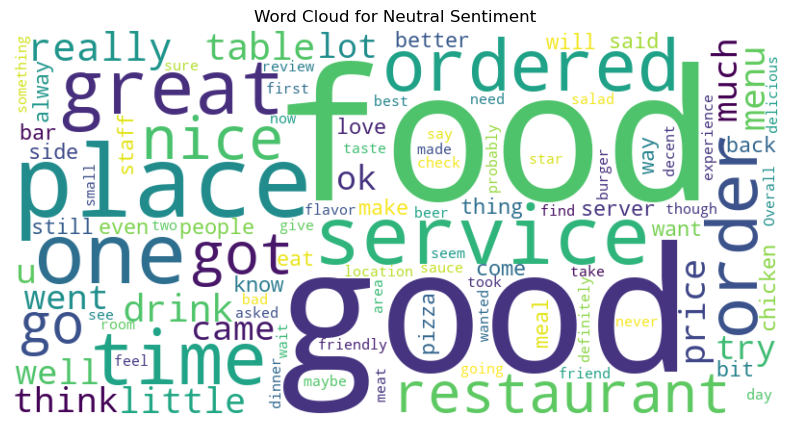

In [11]:
def plot_wordcloud(sentiment, data):
    text = " ".join(data[data['sentiments'] == sentiment]['text'])
    wordcloud = WordCloud(width=800, height=400, max_words=100, background_color='white').generate(text)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud for {sentiment} Sentiment')
    plt.axis('off')
    plt.show()

# Sample 10,000 entries per class for the word cloud
sample_data = pd.concat([
    review_df[review_df['sentiments'] == 'Positive'].sample(10000, random_state=50),
    review_df[review_df['sentiments'] == 'Negative'].sample(10000, random_state=50),
    review_df[review_df['sentiments'] == 'Neutral'].sample(10000, random_state=50)
])

# Plot word clouds for each sentiment class
plot_wordcloud('Positive', sample_data)
plot_wordcloud('Negative', sample_data)
plot_wordcloud('Neutral', sample_data)

### Class Balancing

- There is a huge class imbalance, so we will just take 691934 tweets per class(sentiment)

- 699134 samples for each class was taking too long to preprocess, so downsampling to 20000 per class

In [12]:
#Separating each class
positive_df = review_df[review_df['sentiments'] == 'Positive']
negative_df = review_df[review_df['sentiments'] == 'Negative']
neutral_df = review_df[review_df['sentiments'] == 'Neutral']

#Downsampling each majority class to 691934 samples
positive_downsampled = positive_df.sample(n=20000, random_state=42)
negative_downsampled = negative_df.sample(n=20000, random_state=42)
neutral_downsampled = neutral_df.sample(n=20000, random_state=42)

def text_data_generator(df, batch_size=1000):
    for start in range(0, len(df), batch_size):
        batch_df = df[start:start + batch_size]
        # Apply any text preprocessing needed on batch_df here
        yield batch_df

#Combining all classes into a main DataFrame
main_df = pd.concat([positive_downsampled, negative_downsampled, neutral_downsampled], ignore_index=True)

main_df.head()

,text,sentiments
0,Great Indianapolis staple. Our family favorite...,Positive
1,I would have rated my experience 5 stars excep...,Positive
2,They don't make courthouses like this anymore....,Positive
3,I don't usually leave reviews but I felt Corne...,Positive
4,We went in for breakfast on Sunday morning. I'...,Positive


In [13]:
main_df.shape

(60000, 2)

In [14]:
main_df['sentiments'].value_counts()

sentiments
Positive    20000
Negative    20000
Neutral     20000
Name: count, dtype: int64

### Text Cleaning

In [15]:
slang_dict = {
    "yummy": "delicious",
    "bomb": "amazing",
    "lit": "exciting",
    "crave-worthy": "desirable",
    "meh": "mediocre",
    "epic fail": "disappointing",
    "banger": "excellent",
    "fave": "favorite",
    "legit": "authentic",
    "drool-worthy": "very appealing",
    "sick": "awesome",
    "savage": "bold or very good",
    "extra": "excessive",
    "boujee": "high-class or fancy",
    "basic": "unimaginative",
    "bomb.com": "outstanding",
    "crazy good": "very good",
    "fire": "amazing",
    "go-to": "preferred choice",
    "overhyped": "exaggerated",
    "solid": "reliable",
    "trash": "bad",
    "vibe": "ambiance",
    "pricey": "expensive",
    "cheap": "inexpensive",
    "overpriced": "too expensive",
    "wallet-friendly": "affordable",
    "worth it": "good value",
    "next level": "exceptional",
    "old-school": "classic",
    "spot-on": "accurate",
    "chef’s kiss": "perfect",
    "no cap": "honestly",
    "for real": "truly",
    "low-key": "subtle",
    "high-key": "obvious",
    "slaps": "very good",
    "on point": "well done",
    "straight fire": "excellent",
    "hyped": "exciting",
    "bomb af": "exceptionally good",
    "foodie": "food lover",
    "buzzing": "busy",
    "vibey": "good ambiance",
    "lush": "luxurious",
    "kickin'": "flavorful",
}

def handle_slang(text):
    for slang, replacement in slang_dict.items():
        text = re.sub(r'\b' + slang + r'\b', replacement, text)
    return text

In [16]:
#spell check

sym_spell = SymSpell(max_dictionary_edit_distance=2, prefix_length=7)

dictionary_path = r"C:\Users\DC\Downloads\en-80k.txt"  #downloaded from sysspell's github page
sym_spell.load_dictionary(dictionary_path, term_index=0, count_index=1)

def spell_check(text):
    words = text.split()
    corrected_text = []
    
    for word in words:
        #Find best match with maximum verbosity to return the top suggestion only
        suggestion = sym_spell.lookup(word, Verbosity.CLOSEST, max_edit_distance=2)
        if suggestion:
            corrected_text.append(suggestion[0].term)
        else:
            corrected_text.append(word)
            
    return ' '.join(corrected_text)

In [17]:
idioms_dict = {
    "hit the spot": "satisfying",
    "mouth-watering": "appealing",
    "finger-licking good": "delicious",
    "out of this world": "exceptional",
    "to die for": "very delicious",
    "melt in your mouth": "tender and flavorful",
    "second to none": "top quality",
    "top-notch": "excellent quality",
    "bite the bullet": "tolerate a bad experience",
    "sweet tooth": "liking for sweets",
    "cost an arm and a leg": "very expensive",
    "burn a hole in your pocket": "expensive",
    "on the house": "free",
    "in a nutshell": "in summary",
    "throw in the towel": "give up",
    "packed to the gills": "completely full",
    "bread and butter": "main service or essential"
}

def handle_idioms(text):
    for idiom, replacement in idioms_dict.items():
        text = re.sub(r'\b' + idiom + r'\b', replacement, text)
    return text

In [18]:
abbreviations_dict = {
    "bday": "birthday",
    "bf": "boyfriend",
    "bff": "best friend",
    "btw": "by the way",
    "coz": "because",
    "fav": "favorite",
    "gf": "girlfriend",
    "imo": "in my opinion",
    "lol": "laughing out loud",
    "omg": "oh my god",
    "pls": "please",
    "rt": "right",
    "svc": "service",
    "tbh": "to be honest",
    "tho": "though",
    "ty": "thank you",
    "u": "you",
    "ur": "your",
    "v": "very",
    "veg": "vegetarian",
    "w/": "with",
    "w/o": "without",
    "y'all": "you all",
    "yo": "your",
    "yrs": "years",
    "smh": "shaking my head",
    "fyi": "for your information",
    "fam": "family",
    "ppl": "people",
    "rec": "recommend",
    "atm": "at the moment",
    "thx": "thanks",
    "lmk": "let me know",
    "nvm": "never mind",
    "bbq": "barbecue",
    "exp": "experience",
    "ftw": "for the win",
    "hrs": "hours",
    "mins": "minutes",
    "mins ago": "minutes ago",
    "hrs ago": "hours ago",
    "diy": "do it yourself",
    "decaf": "decaffeinated",
    "gf (food)": "gluten-free",
    "vf": "vegan-friendly",
    "inc": "included",
    "ft": "featuring",
    "wknd": "weekend",
    "2-for-1": "two for one",
    "bogo": "buy one get one",
    "msg": "message",
    "ltr": "later",
    "qt": "cutie",
    "s/o": "shoutout",
    "sq ft": "square feet",
    "ld": "limited"
}


def expand_abbreviations(text, abbreviation_dict):
    words = text.split()
    expanded_text = []
    
    for word in words:
        if word in abbreviation_dict:  
            expanded_text.append(abbreviation_dict[word])
        else:
            expanded_text.append(word)
    
    return ' '.join(expanded_text)

In [19]:
def handle_negation(text):
    negation_words = ['not', "isn't", "aren't", "didn't", "doesn't", "never", "no", "without", "none"]

    words = text.split()
    
    negate = False
    processed_words = []
    
    for word in words:
        if word.lower() in negation_words:
            negate = True
            processed_words.append(word)  
        elif negate:
            processed_words.append('NOT_' + word)
            negate = False
        else:
            processed_words.append(word)

    return ' '.join(processed_words)

In [20]:
def preprocess_1(text):

    text = text.lower() #lowercasing the text
    text = re.sub(r'\s+', ' ', text).strip() #removing extra space

    text = re.sub(r'#(\w+)', r'\1', text) #removing the '#' symbol from hashtags but keeping the word

    text = re.sub(r'http\S+|www\S+', '', text) #removing urls

    text = re.sub(r'\d+', '', text) #removing digits

    text = emoji.demojize(text) #removing emojis

    text = text.translate(str.maketrans('', '', string.punctuation)) #removing punctuations

    text = re.sub(r'[^a-zA-Z0-9\s]', '', text) #remove special characters
    
    return text

In [21]:
def preprocess_2(text):

    text = handle_slang(text) 

    text = handle_idioms(text)

    text = expand_abbreviations(text, abbreviations_dict)

    text = spell_check(text)

In [22]:
main_df['processed_text'] = main_df['text'].apply(preprocess_1)

In [23]:
main_df.head()

,text,sentiments,processed_text
0,Great Indianapolis staple. Our family favorite...,Positive,great indianapolis staple our family favorite ...
1,I would have rated my experience 5 stars excep...,Positive,i would have rated my experience stars except...
2,They don't make courthouses like this anymore....,Positive,they dont make courthouses like this anymore t...
3,I don't usually leave reviews but I felt Corne...,Positive,i dont usually leave reviews but i felt corner...
4,We went in for breakfast on Sunday morning. I'...,Positive,we went in for breakfast on sunday morning ive...


In [24]:
main_df['processed_text'] = main_df['processed_text'].apply(handle_slang)

In [25]:
main_df['processed_text'] = main_df['processed_text'].apply(handle_idioms)

In [26]:
main_df['processed_text'] = main_df['processed_text'].apply(expand_abbreviations, abbreviation_dict = abbreviations_dict)

In [27]:
main_df['processed_text'] = main_df['processed_text'].apply(spell_check)

In [28]:
main_df['final_processed_text'] = main_df['processed_text'].apply(handle_negation)

In [29]:
main_df.head()

,text,sentiments,processed_text,final_processed_text
0,Great Indianapolis staple. Our family favorite...,Positive,great indianapolis staple our family favorite ...,great indianapolis staple our family favorite ...
1,I would have rated my experience 5 stars excep...,Positive,i would have rated my experience stars except ...,i would have rated my experience stars except ...
2,They don't make courthouses like this anymore....,Positive,they done make courthouses like this anymore t...,they done make courthouses like this anymore t...
3,I don't usually leave reviews but I felt Corne...,Positive,i done usually leave reviews but i felt corner...,i done usually leave reviews but i felt corner...
4,We went in for breakfast on Sunday morning. I'...,Positive,we went in for breakfast on sunday morning giv...,we went in for breakfast on sunday morning giv...


In [30]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   text                  60000 non-null  object
 1   sentiments            60000 non-null  object
 2   processed_text        60000 non-null  object
 3   final_processed_text  60000 non-null  object
dtypes: object(4)
memory usage: 1.8+ MB


### Train/Test Splitting

In [31]:
X= main_df['final_processed_text']
y = main_df['sentiments']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Train shape: {X_train.shape}, Test shape: {X_test.shape}")

Train shape: (48000,), Test shape: (12000,)


### Tokenization

In [32]:
vocab_size = 20000      #consider the top 20k words
tokenizer = Tokenizer(num_words=vocab_size)  #Tokenization
tokenizer.fit_on_texts(main_df['final_processed_text'])

tokenizer.fit_on_texts(X_train)
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)


In [33]:
len(X_train_seq)

48000

In [34]:
max_len = 200       # consider the first 200 words of the review
X_train = pad_sequences(X_train_seq, padding='post', maxlen=max_len)
X_test = pad_sequences(X_test_seq, padding='post', maxlen=max_len)

X_train_padded = pad_sequences(X_train_seq, maxlen=max_len, padding='post')
X_test_padded = pad_sequences(X_test_seq, maxlen=max_len, padding='post')

print(f"X_train shape after padding: {X_train_padded.shape}")
print(f"X_test shape after padding: {X_test_padded.shape}")


X_train shape after padding: (48000, 200)
X_test shape after padding: (12000, 200)


Tokenized sequences are used for now, embeddings will be used with respect to the model being built

In [35]:
label_encoder = LabelEncoder() #Label Encoding
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)
y_train[:10], y_test[:10]


(array([1, 0, 2, 0, 0, 1, 2, 0, 1, 1]), array([2, 0, 0, 2, 2, 1, 2, 2, 2, 0]))

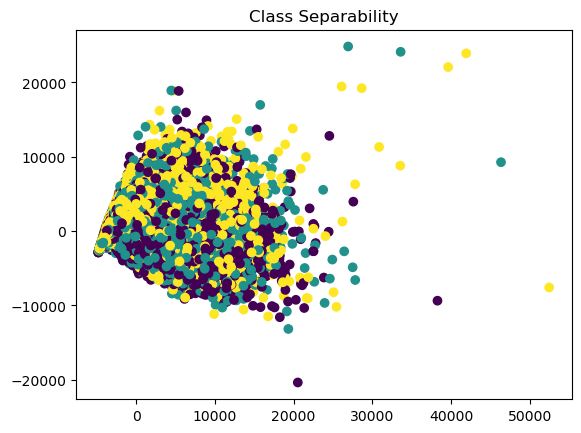

In [36]:
#Checking class separability
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap='viridis')
plt.title("Class Separability")
plt.show()

## **Causal Transformer Model with Relative Positions**

## Model Building
For the base model, A dense model with layer normalization is used

In [37]:
class RelativePositionalEncoding(tf.keras.layers.Layer):
    def __init__(self, max_len, embed_dim):
        super(RelativePositionalEncoding, self).__init__()
        self.max_len = max_len
        self.embed_dim = embed_dim
        self.pos_encoding = self.compute_relative_positions(max_len, embed_dim)

    def compute_relative_positions(self, max_len, embed_dim):
        position = np.arange(max_len)
        position = position[:, np.newaxis] - position[np.newaxis, :]
        position = position / np.sqrt(embed_dim)
        
        position = np.expand_dims(position, axis=0)  
        position = np.repeat(position, embed_dim, axis=-1)  
        
        return tf.cast(position, dtype=tf.float32)

    def call(self, inputs):
        pos_encoding = self.pos_encoding[:, :tf.shape(inputs)[1], :self.embed_dim]
        return inputs + pos_encoding

In [38]:
class CausalMultiHeadAttention(Layer):
    def __init__(self, num_heads, embed_dim):
        super(CausalMultiHeadAttention, self).__init__()
        self.attn = MultiHeadAttention(num_heads=num_heads, key_dim=embed_dim)
    
    def call(self, inputs):
        mask = tf.linalg.band_part(tf.ones_like(inputs), -1, 0)  
        return self.attn(inputs, inputs, attention_mask=mask)

In [66]:
def transformer_block(inputs, embed_dim, num_heads, ff_dim):
    attention_output = MultiHeadAttention(num_heads=num_heads, key_dim=embed_dim)(inputs, inputs)
    attention_output = LayerNormalization()(attention_output + inputs)  
    
    ff_output = Dense(ff_dim, activation='relu')(attention_output)
    ff_output = Dense(embed_dim)(ff_output)
    ff_output = LayerNormalization()(ff_output + attention_output)  
    
    return ff_output

In [67]:
def build_model(vocab_size, max_len, embed_dim, num_heads, ff_dim):
    input_layer = tf.keras.layers.Input(shape=(max_len,))
    embedding_layer = tf.keras.layers.Embedding(input_dim=vocab_size, output_dim=embed_dim)(input_layer)
    positional_encoding_layer = RelativePositionalEncoding(max_len, embed_dim)(embedding_layer)
    transformer_output = transformer_block(positional_encoding_layer, embed_dim, num_heads, ff_dim)
    pooled_output = tf.keras.layers.GlobalAveragePooling1D()(transformer_output)
    output_layer = tf.keras.layers.Dense(3, activation='softmax')(pooled_output)  
    
    model = tf.keras.models.Model(inputs=input_layer, outputs=output_layer)
    return model

In [68]:
vocab_size = 20000  
max_len = 200       
embed_dim = 64      
num_heads = 4       
ff_dim = 128       

model1 = build_model(vocab_size, max_len, embed_dim, num_heads, ff_dim)
model1.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
model1.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 200)]        0           []                               
                                                                                                  
 embedding_2 (Embedding)        (None, 200, 64)      1280000     ['input_3[0][0]']                
                                                                                                  
 relative_positional_encoding_2  (None, 200, 64)     0           ['embedding_2[0][0]']            
  (RelativePositionalEncoding)                                                                    
                                                                                                  
 multi_head_attention_2 (MultiH  (None, 200, 64)     66368       ['relative_positional_encod

In [71]:
start_time = time.time()
history1 = model1.fit(X_train_padded, y_train, validation_data=(X_test_padded, y_test), epochs=5, batch_size=64)
end_time = time.time()
train_time = end_time - start_time
print(f"\nTraining Time: {train_time:.2f} seconds") #Training Time

Epoch 1/5
750/750 [==============================] - 269s 358ms/step - loss: 1.1059 - accuracy: 0.3362 - val_loss: 1.0996 - val_accuracy: 0.3345
Epoch 2/5
750/750 [==============================] - 273s 364ms/step - loss: 1.1007 - accuracy: 0.3509 - val_loss: 1.0921 - val_accuracy: 0.3611
Epoch 3/5
750/750 [==============================] - 280s 373ms/step - loss: 1.0201 - accuracy: 0.4600 - val_loss: 0.9738 - val_accuracy: 0.5188
Epoch 4/5
750/750 [==============================] - 273s 364ms/step - loss: 0.9344 - accuracy: 0.5544 - val_loss: 0.9442 - val_accuracy: 0.5322
Epoch 5/5
750/750 [==============================] - 261s 347ms/step - loss: 0.8877 - accuracy: 0.5834 - val_loss: 0.9052 - val_accuracy: 0.5626

Training Time: 1357.05 seconds


## Model Evaluation

In [72]:
def evaluate_model_on_train(model, X_train, y_train, label_encoder):
    y_pred = model.predict(X_train)
      
    y_pred_class = np.argmax(y_pred, axis=1)  

    accuracy = np.mean(y_pred_class == y_train)  # Accuracy
    print(f"Accuracy: {accuracy}")
    
    cm = confusion_matrix(y_train, y_pred_class)  # Confusion Matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()

    f1_scores = f1_score(y_train, y_pred_class, average=None)
    for i, label in enumerate(['Positive', 'Negative', 'Neutral']):
        print(f"F1 Score for {label}: {f1_scores[i]}")

    auc = roc_auc_score(y_train, y_pred, multi_class='ovr')  # AUC Score 
    print(f"AUC: {auc}")


In [44]:
def evaluate_model_on_test(model, X_test, y_test, label_encoder):
    y_pred = model.predict(X_test)
    y_pred_class = np.argmax(y_pred, axis=1)  

    accuracy = np.mean(y_pred_class == y_test) #Accuracy
    print(f"Accuracy: {accuracy}")
    
    cm = confusion_matrix(y_test, y_pred_class) # Confusion Matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()

    f1_scores = f1_score(y_test, y_pred_class, average=None)
    for i, label in enumerate(['Positive', 'Negative', 'Neutral']):
        print(f"F1 Score for {label}: {f1_scores[i]}")

    auc = roc_auc_score(y_test, y_pred, multi_class='ovr') # AUC Score 
    print(f"AUC: {auc}")

   

## Training Evaluation

1500/1500 [==============================] - 108s 72ms/step
Accuracy: 0.6152291666666667


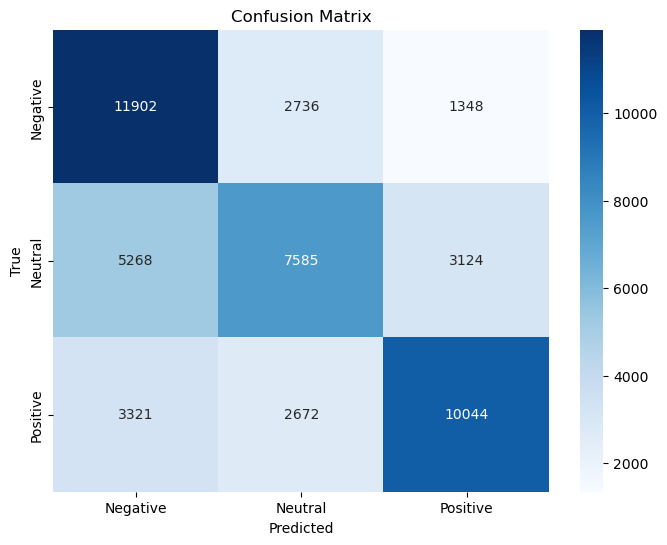

F1 Score for Positive: 0.6525755955807769
F1 Score for Negative: 0.5236451501553332
F1 Score for Neutral: 0.6574804438189377
AUC: 0.7992373018757384


In [73]:
evaluate_model_on_train(model1, X_train, y_train, label_encoder)

1500/1500 [==============================] - 108s 72ms/step


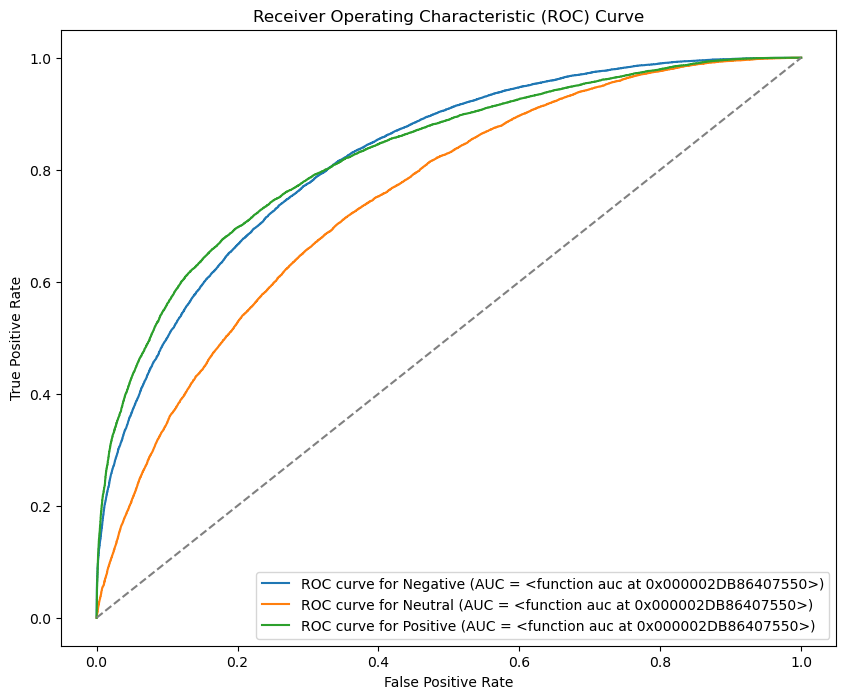

In [74]:
y_pred=model1.predict(X_train)
y_train_bin = label_binarize(y_train, classes=np.arange(len(label_encoder.classes_)))  # Binarize labels for ROC
plt.figure(figsize=(10, 8))
    
# Loop through each class to plot the ROC curve
for i, class_label in enumerate(label_encoder.classes_):
    fpr, tpr, _ = roc_curve(y_train_bin[:, i], y_pred[:, i])
    plt.plot(fpr, tpr, label=f'ROC curve for {class_label} (AUC = {auc})')

plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # Random classifier line
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()

## Test Evaluation

375/375 [==============================] - 27s 72ms/step
Accuracy: 0.5625833333333333


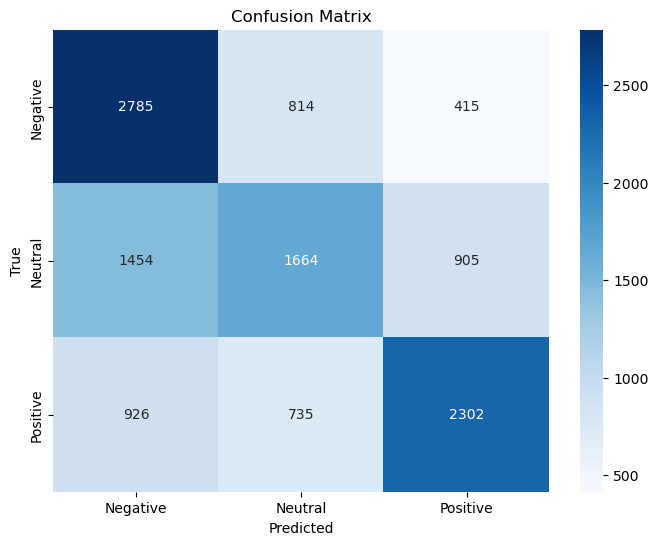

F1 Score for Positive: 0.606819915023423
F1 Score for Negative: 0.45992260917634054
F1 Score for Neutral: 0.6069874752801583
AUC: 0.7534129029652713


In [75]:
evaluate_model_on_test(model1, X_test, y_test, label_encoder)

375/375 [==============================] - 42s 111ms/step


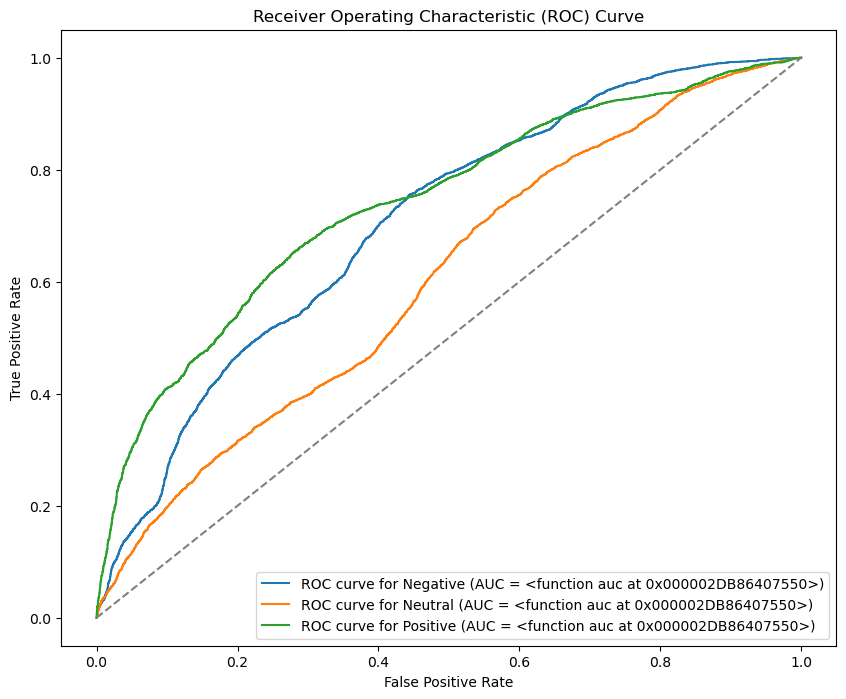

In [48]:
y_pred=model1.predict(X_test)
y_test_bin = label_binarize(y_test, classes=np.arange(len(label_encoder.classes_)))  
plt.figure(figsize=(10, 8))
    
for i, class_label in enumerate(label_encoder.classes_):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_pred[:, i])
    plt.plot(fpr, tpr, label=f'ROC curve for {class_label} (AUC = {auc})')

plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # Random classifier line
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()

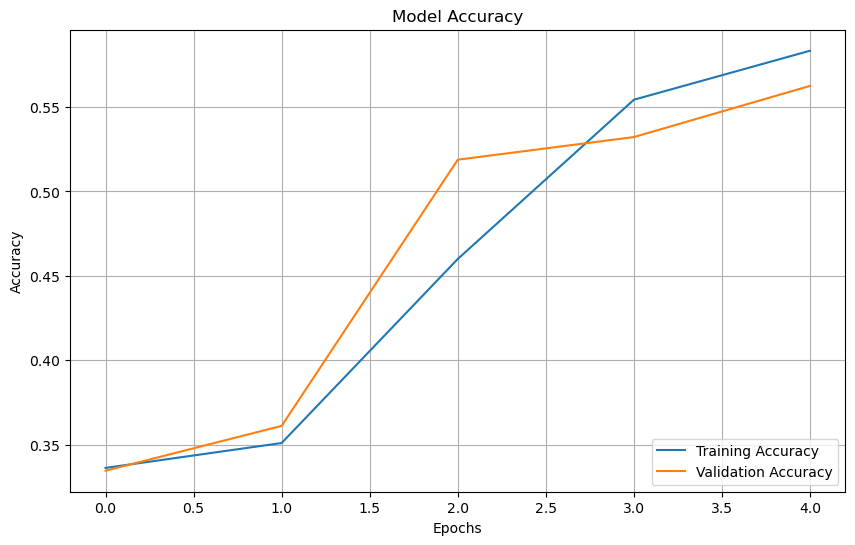

In [76]:
plt.figure(figsize=(10, 6)) #Accuracy graph
plt.plot(history1.history['accuracy'], label='Training Accuracy')
if 'val_accuracy' in history1.history:
    plt.plot(history1.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

## Model Iteration 2 
In the first iteration, there seem to be overfitting. Hence, introducing linformer which by default uses relative positions, dropout layers, l2 regularization and early stopping

In [127]:
from linformer import Linformer

In [185]:
label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(review_df['sentiments'])

print("Class Mapping from LabelEncoder:")
for index, class_label in enumerate(label_encoder.classes_):
    print(f"{class_label} is encoded as {index}")

Class Mapping from LabelEncoder:
Negative is encoded as 0
Neutral is encoded as 1
Positive is encoded as 2


In [186]:
label_mapping = {'Negative': 0, 'Neutral': 1, 'Positive': 2}
review_df['sentiments'] = review_df['sentiments'].map(label_mapping)

class_labels = np.array([0, 1, 2])  
class_weights = compute_class_weight('balanced', classes=class_labels, y=review_df['sentiments'])

class_weight_dict = dict(zip(class_labels, class_weights))


In [187]:
class LinformerSelfAttention(tf.keras.layers.Layer):
    def __init__(self, embed_dim, num_heads, seq_len, dropout_rate=0.4):
        super(LinformerSelfAttention, self).__init__()
        self.embed_dim = embed_dim
        self.num_heads = num_heads
        self.seq_len = seq_len
        
        self.attention = MultiHeadAttention(num_heads=num_heads, key_dim=embed_dim)
        self.key_projection = Dense(embed_dim)  # Project keys to the same dimension as queries
        self.value_projection = Dense(embed_dim)  # Project values to the same dimension as queries
        self.dropout = Dropout(dropout_rate)
        self.layernorm = LayerNormalization()

    def call(self, inputs):
        # Project keys and values to match the dimension of queries
        keys = self.key_projection(inputs)
        values = self.value_projection(inputs)
        
        # Compute multi-head attention with projected keys and values
        attention_output = self.attention(inputs, keys, values)
        attention_output = self.dropout(attention_output)
        
        # Residual connection and layer normalization
        return self.layernorm(inputs + attention_output)

In [188]:
def Linformer_block(inputs, embed_dim, num_heads, ff_dim, seq_len, dropout_rate=0.4):
    attention_output = LinformerSelfAttention(embed_dim, num_heads, seq_len, dropout_rate)(inputs)
    
    # Feed-forward layer with increased L2 regularization
    ffn_output = Dense(ff_dim, activation="relu", kernel_regularizer=l2(0.02))(attention_output)
    ffn_output = Dense(embed_dim, kernel_regularizer=l2(0.02))(ffn_output)
    ffn_output = Dropout(dropout_rate)(ffn_output)
    
    # Add & Norm
    return LayerNormalization()(attention_output + ffn_output)

# Define early stopping and learning rate scheduler with adjusted patience
early_stopping = EarlyStopping(monitor='val_loss', patience=1, restore_best_weights=True)
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.4, patience=1, min_lr=1e-6)

In [189]:
embed_dim = 32  
ff_dim = 64     
num_heads = 8   
seq_len = 200   
dropout_rate = 0.4

inputs = Input(shape=(seq_len,))
vocab_size = 20000  
embedding_layer = Embedding(input_dim=vocab_size, output_dim=embed_dim, input_length=seq_len)(inputs)
transformer_output = Linformer_block(embedding_layer, embed_dim, num_heads, ff_dim, seq_len, dropout_rate)
transformer_output = Linformer_block(transformer_output, embed_dim, num_heads, ff_dim, seq_len, dropout_rate)
pooled_output = GlobalAveragePooling1D()(transformer_output)
outputs = Dense(3, activation='softmax')(pooled_output)  # 3 classes: Positive, Negative, Neutral
linformer_model = Model(inputs=inputs, outputs=outputs)

linformer_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=2e-5), 
                        loss='sparse_categorical_crossentropy', metrics=['accuracy'])

linformer_model.summary()

Model: "model_8"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_18 (InputLayer)          [(None, 200)]        0           []                               
                                                                                                  
 embedding_17 (Embedding)       (None, 200, 32)      640000      ['input_18[0][0]']               
                                                                                                  
 linformer_self_attention_4 (Li  (None, 200, 32)     35744       ['embedding_17[0][0]']           
 nformerSelfAttention)                                                                            
                                                                                                  
 dense_39 (Dense)               (None, 200, 64)      2112        ['linformer_self_attention_

In [193]:
start_time = time.time()

history_linformer = linformer_model.fit(
    X_train_padded, y_train,
    class_weight=class_weight_dict,
    epochs=10,  # Increased epochs
    validation_data=(X_test_padded, y_test),
    batch_size=128,  # Larger batch size for efficiency
    callbacks=[early_stopping, lr_scheduler]
)

end_time = time.time()
train_time = end_time - start_time
print(f"\nTraining Time: {train_time:.2f} seconds") #Training Time

Epoch 1/10
375/375 [==============================] - 670s 2s/step - loss: 4.7658 - accuracy: 0.3329 - val_loss: 4.5172 - val_accuracy: 0.3352 - lr: 2.0000e-05
Epoch 2/10
375/375 [==============================] - 693s 2s/step - loss: 4.4883 - accuracy: 0.3350 - val_loss: 4.2547 - val_accuracy: 0.3568 - lr: 2.0000e-05
Epoch 3/10
375/375 [==============================] - 676s 2s/step - loss: 4.1796 - accuracy: 0.3867 - val_loss: 3.9830 - val_accuracy: 0.4408 - lr: 2.0000e-05
Epoch 4/10
375/375 [==============================] - 681s 2s/step - loss: 3.8392 - accuracy: 0.4781 - val_loss: 3.7173 - val_accuracy: 0.5016 - lr: 2.0000e-05
Epoch 5/10
375/375 [==============================] - 678s 2s/step - loss: 3.5558 - accuracy: 0.5125 - val_loss: 3.4679 - val_accuracy: 0.5117 - lr: 2.0000e-05
Epoch 6/10
375/375 [==============================] - 683s 2s/step - loss: 3.2939 - accuracy: 0.5460 - val_loss: 3.1329 - val_accuracy: 0.5757 - lr: 2.0000e-05
Epoch 7/10
375/375 [====================

## Model Evaluation - Training

1500/1500 [==============================] - 365s 243ms/step
Accuracy: 0.7053333333333334


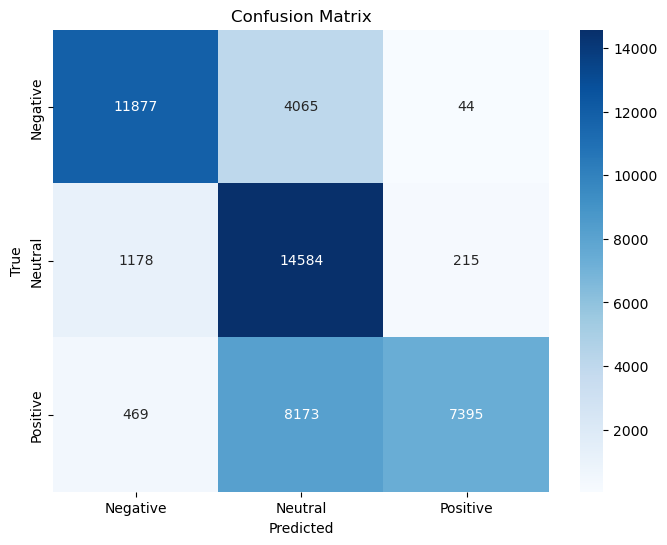

F1 Score for Positive: 0.804947475432057
F1 Score for Negative: 0.6815112502628565
F1 Score for Neutral: 0.6242877041914651
AUC: 0.9116697408842133


In [204]:
evaluate_model_on_train(linformer_model, X_train, y_train, label_encoder)

1500/1500 [==============================] - 350s 233ms/step


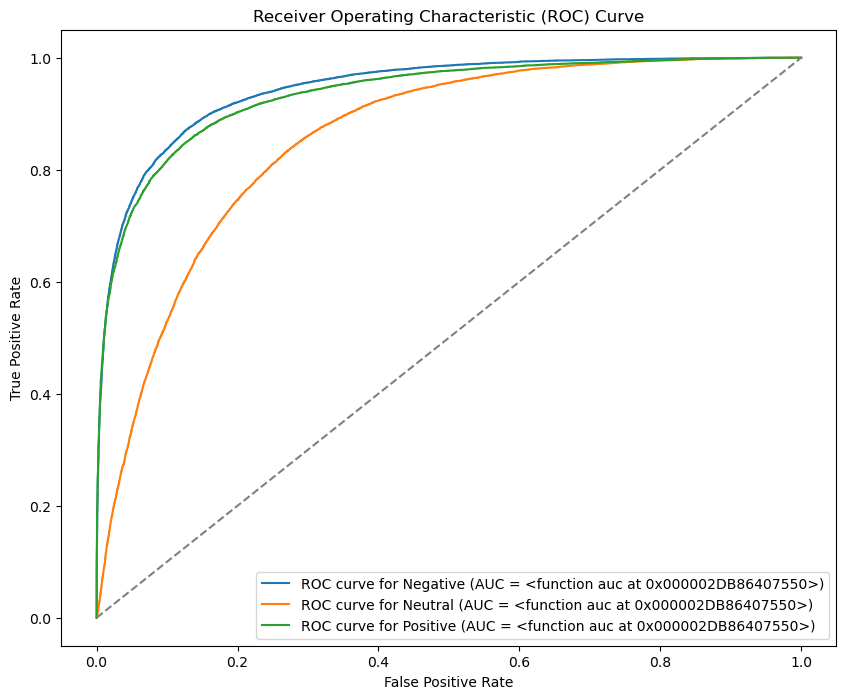

In [205]:
y_pred=linformer_model.predict(X_train)
y_train_bin = label_binarize(y_train, classes=np.arange(len(label_encoder.classes_)))  
plt.figure(figsize=(10, 8))
    
for i, class_label in enumerate(label_encoder.classes_):
    fpr, tpr, _ = roc_curve(y_train_bin[:, i], y_pred[:, i])
    plt.plot(fpr, tpr, label=f'ROC curve for {class_label} (AUC = {auc})')

plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()

## Model Evaluation - Testing

375/375 [==============================] - 89s 237ms/step
Accuracy: 0.6794166666666667


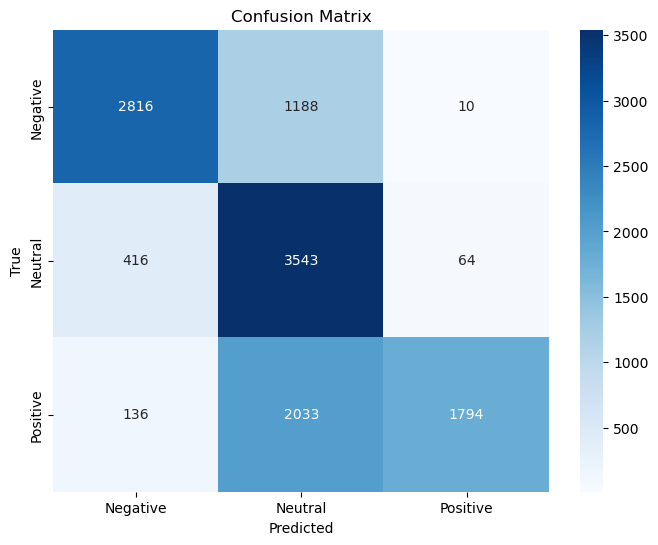

F1 Score for Positive: 0.7629368734760227
F1 Score for Negative: 0.6569018262723648
F1 Score for Neutral: 0.615331847024524
AUC: 0.8906965840377162


In [206]:
evaluate_model_on_test(linformer_model, X_test, y_test, label_encoder)

375/375 [==============================] - 89s 237ms/step


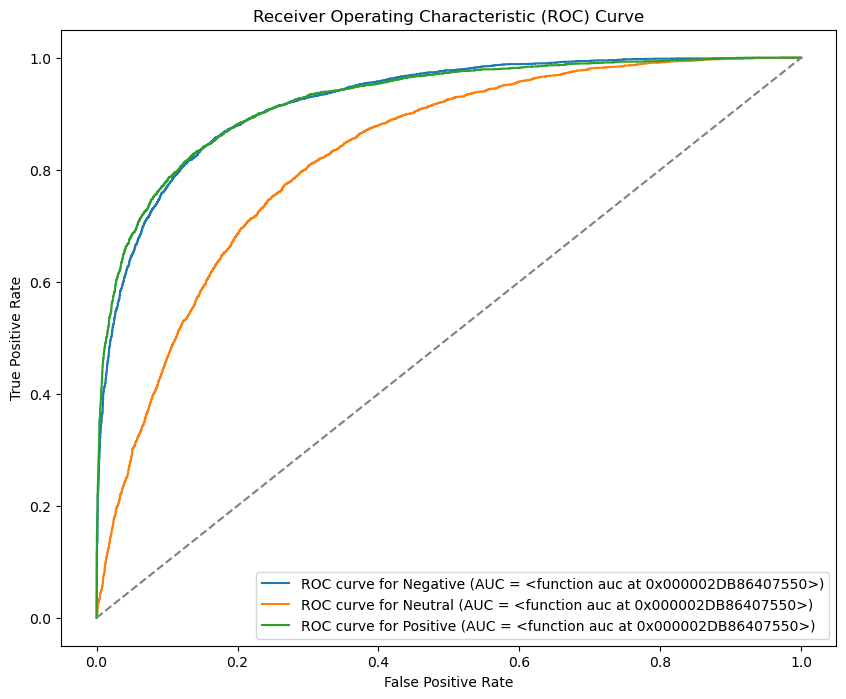

In [207]:
y_pred=linformer_model.predict(X_test)
y_test_bin = label_binarize(y_test, classes=np.arange(len(label_encoder.classes_)))  
plt.figure(figsize=(10, 8))
    
for i, class_label in enumerate(label_encoder.classes_):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_pred[:, i])
    plt.plot(fpr, tpr, label=f'ROC curve for {class_label} (AUC = {auc})')

plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # Random classifier line
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()

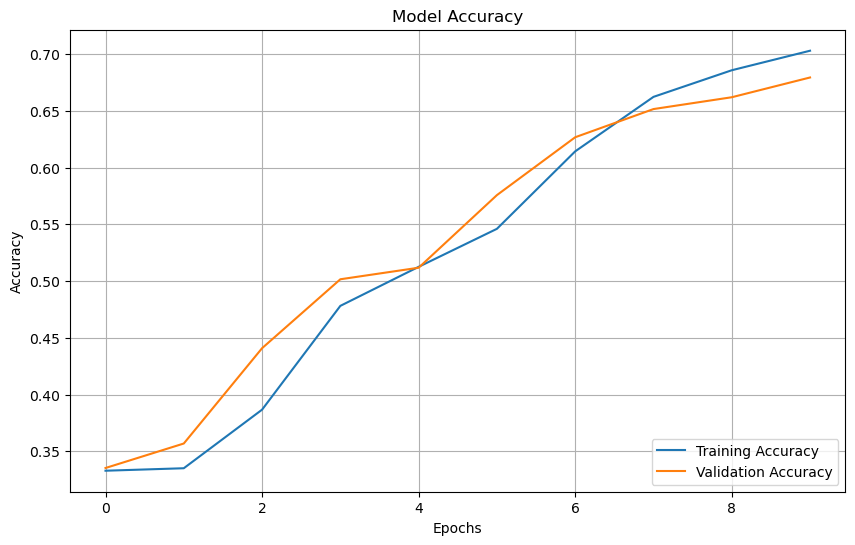

In [208]:
plt.figure(figsize=(10, 6)) #Accuracy graph
plt.plot(history_linformer.history['accuracy'], label='Training Accuracy')
if 'val_accuracy' in history_linformer.history:
    plt.plot(history_linformer.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

Introduction of linformer and other techniques to handle overfitting has improved the model

## Stratified Cross Validation

In [213]:
kf = StratifiedKFold(n_splits=5)
fold_accuracy = []

for train_index, val_index in kf.split(X_train_padded, y_train):
    X_fold_train, X_fold_val = X_train_padded[train_index], X_train_padded[val_index]
    y_fold_train, y_fold_val = y_train[train_index], y_train[val_index]
    
    linformer_model.fit(X_fold_train, y_fold_train, epochs=5, batch_size=32, verbose=0)  
    y_fold_pred = np.argmax(linformer_model.predict(X_fold_val), axis=-1) 
    fold_accuracy.append(accuracy_score(y_fold_val, y_fold_pred))

print(f"Cross-Validation Accuracies: {fold_accuracy}")
print(f"Mean CV Accuracy: {np.mean(fold_accuracy)}")


300/300 [==============================] - 62s 205ms/step
Cross-Validation Accuracies: [0.7947916666666667, 0.8220833333333334, 0.8497916666666666, 0.8644791666666667, 0.8869791666666667]
Mean CV Accuracy: 0.843625


## Model Interpretation
There's slight overfitting, Interpreting the model and introducing more techniques will help perfect the model.

### Top 2 Features by weight

In [211]:
embedding_weights = linformer_model.get_layer('embedding_17').get_weights()[0]  
feature_importance = np.linalg.norm(embedding_weights, axis=1)  
top_features = np.argsort(feature_importance)[-2:]  
print(f"Top 2 features by weight: {top_features}")


Top 2 features by weight: [ 45 528]


In [212]:
word_index = tokenizer.word_index  
word_at_index_45 = [word for word, index in word_index.items() if index == 45]
word_at_index_528 = [word for word, index in word_index.items() if index == 528]

print(f"Word at index 45: {word_at_index_45}")
print(f"Word at index 528: {word_at_index_528}")

Word at index 45: ['great']
Word at index 528: ['fantastic']


### Local Interpretability using SHAP

In [219]:
import shap
import numpy as np

# Step 1: Select one sample tweet (e.g., the first tweet in X_test_padded)
sample_index = 0
sample_tweet_token_ids = X_test_padded[sample_index:sample_index + 1]

# Step 2: Convert token IDs back to words (removing padding tokens if any)
# tokenizer.sequences_to_texts() will convert tokenized indices back to words
sample_tweet_words = tokenizer.sequences_to_texts(sample_tweet_token_ids)[0].split()

# Step 3: Initialize SHAP explainer with a small sample of training data
X_train_sample = X_train[np.random.choice(X_train.shape[0], 3, replace=False)]
explainer = shap.KernelExplainer(linformer_model.predict, X_train_sample)

# Step 4: Calculate SHAP values for the sample tweet
# Getting the SHAP values for the sample tweet
shap_values = explainer.shap_values(sample_tweet_token_ids)[0]  # [0] for the first class (or relevant class)

# Step 5: Remove padding tokens from the SHAP values (if padding exists)
# If padding was added, remove tokens that are zeros in the padded sequence
padding_index = sample_tweet_token_ids == 0
filtered_shap_values = shap_values[:, ~padding_index.flatten()]  # Filter out padding tokens
filtered_sample_words = [word for i, word in enumerate(sample_tweet_words) if not padding_index[0, i]]

# Step 6: Check if lengths match after filtering padding
if len(filtered_sample_words) != filtered_shap_values.shape[1]:
    print(f"Mismatch in length between filtered words ({len(filtered_sample_words)}) and SHAP values ({filtered_shap_values.shape[1]})")

# Step 7: Visualize the SHAP values for the actual words
shap.force_plot(
    explainer.expected_value[0],
    filtered_shap_values.flatten(),  # Flatten to match word features
    feature_names=filtered_sample_words  # display actual words
)


1/1 [==============================] - 0s 111ms/step


  0%|          | 0/1 [00:00<?, ?it/s]

230/230 [==============================] - 47s 202ms/step


1/1 [==============================] - 1s 555ms/step


  0%|          | 0/3 [00:00<?, ?it/s]

228/228 [==============================] - 45s 198ms/step


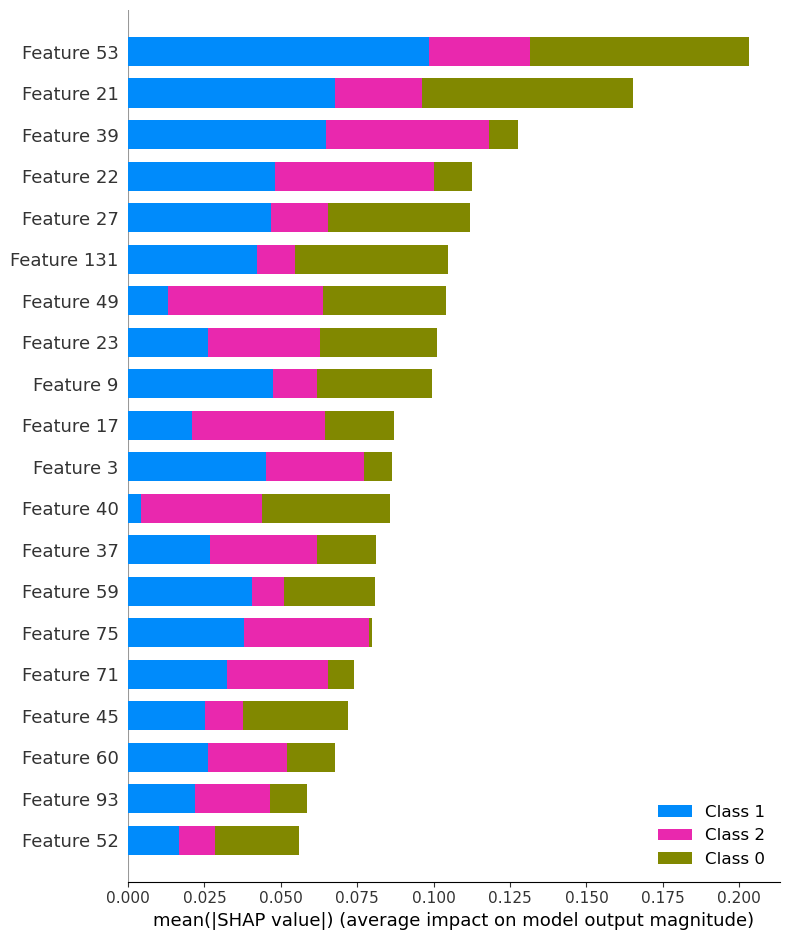

In [214]:
X_train_sample = X_train[np.random.choice(X_train.shape[0], 3, replace=False)]
X_test_sample = X_test_padded[np.random.choice(X_test_padded.shape[0], 3, replace=False)]

explainer = shap.KernelExplainer(linformer_model.predict, X_train_sample)
shap_values = explainer.shap_values(X_test_sample)
shap.summary_plot(shap_values, X_test_sample)


### Global Interpretability using LIME

157/157 [==============================] - 31s 195ms/step


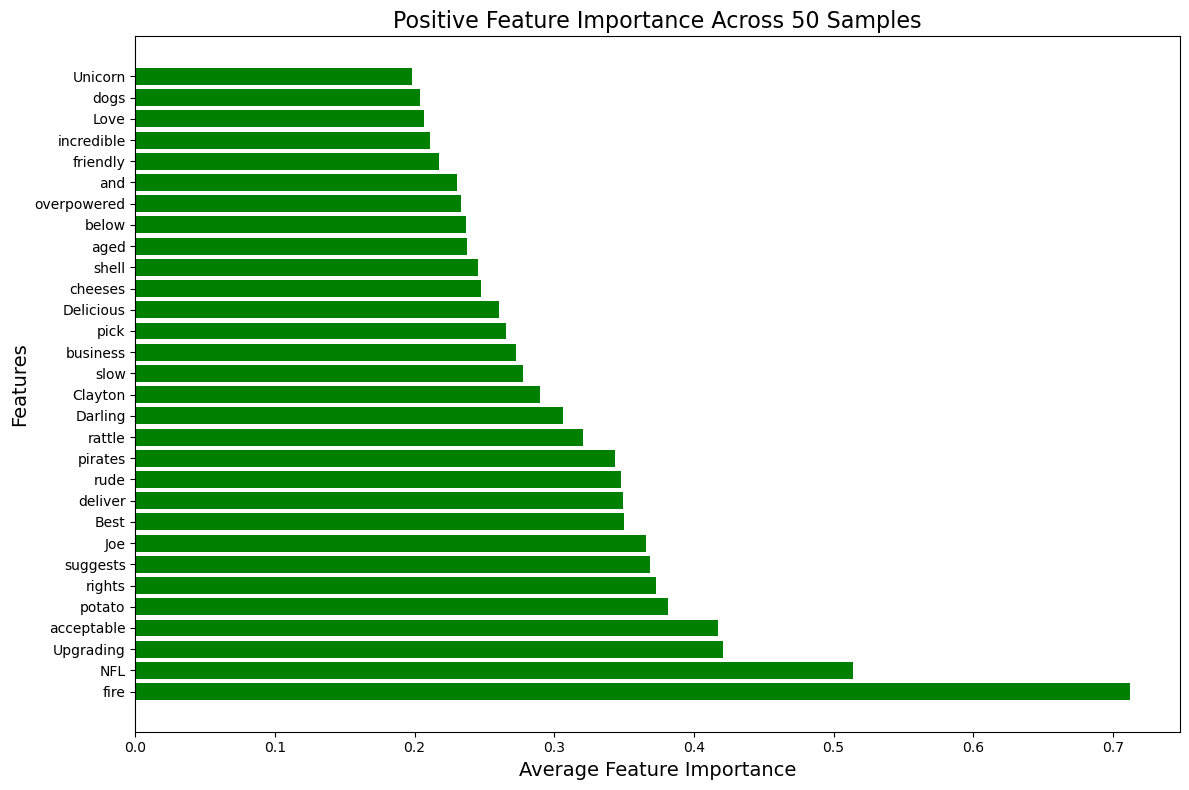

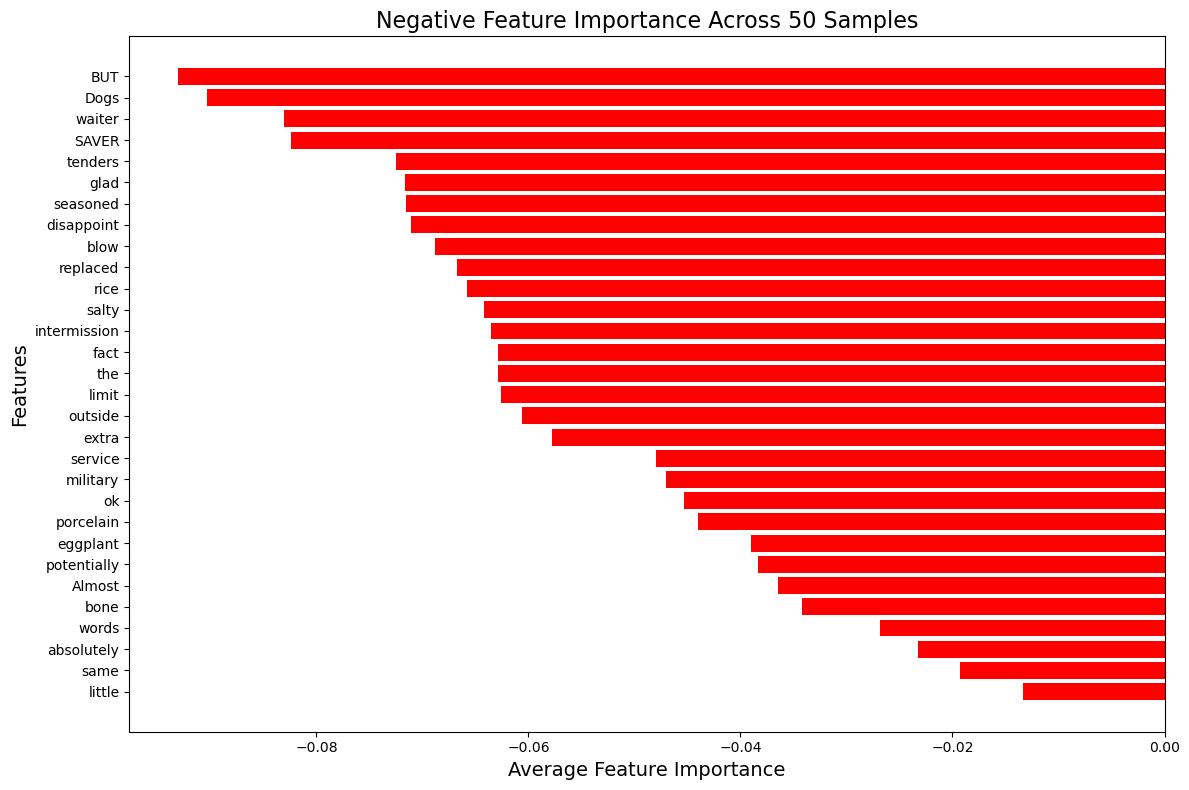

In [215]:
def prediction(texts):
    sequences = tokenizer.texts_to_sequences(texts)
    padded_sequences = pad_sequences(sequences, maxlen=200)
    return linformer_model.predict(padded_sequences)

explainer = LimeTextExplainer(class_names=['Negative', 'Neutral', 'Positive'])
samples = main_df['text'].iloc[np.random.choice(range(len(main_df)), size=50, replace=False)].tolist()

global_explanations = []
for text in samples:
    explanation = explainer.explain_instance(text, prediction, num_features=6, top_labels=1)
    top_label = explanation.top_labels[0]  # Directly get the top predicted label
    global_explanations.extend(explanation.as_list(label=top_label))  # Append directly

global_df = pd.DataFrame(global_explanations, columns=['Feature', 'Importance'])

global_importance = global_df.groupby('Feature').mean().reset_index().sort_values(by='Importance', ascending=False)

positive_importance = global_importance[global_importance['Importance'] > 0]
negative_importance = global_importance[global_importance['Importance'] < 0]

def plot_feature_importance(data, title, color):
    plt.figure(figsize=(12, 8))
    top_features = data.head(30)
    plt.barh(top_features['Feature'], top_features['Importance'], color=color)
    plt.xlabel('Average Feature Importance', fontsize=14)
    plt.ylabel('Features', fontsize=14)
    plt.title(title, fontsize=16)
    plt.tight_layout()
    plt.show()

plot_feature_importance(positive_importance, 'Positive Feature Importance Across 50 Samples', 'green')
plot_feature_importance(negative_importance, 'Negative Feature Importance Across 50 Samples', 'red')


Linformer and Dropout layers helped the model avoid overfitting and improve accuracy. Moving forward, techniques like Data Augmentation, Learning rate adjustment and Hyperparameter tuning might avoid overfitting completely and improve the model accuracy.